
# K-Means Clustering 

GOAL: Segment the Malls data based on the annual income and spending score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/Mall_Customers.csv')

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# note using array syntax to specify the columns to pick
# .values convert the dataframe to array
X = data.iloc[:,[3,4]].values

In [5]:
from sklearn.cluster import KMeans

In [6]:
# Using Elbow Method to find the optimal number of clusters
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init= 10, 
                    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


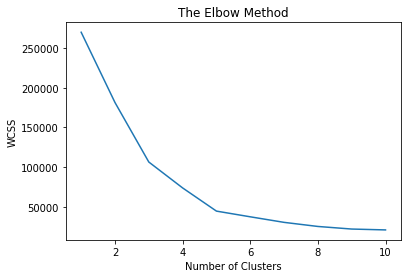

In [7]:
## At k=5 is elbow

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
## Applying the k-means to data
kmeans = KMeans(n_clusters =5, 
                init='k-means++', 
                max_iter=300, 
                n_init =10, 
                random_state = 0)

#for each observation tell to which cluster customer belongs
y_kmeans = kmeans.fit_predict(X)

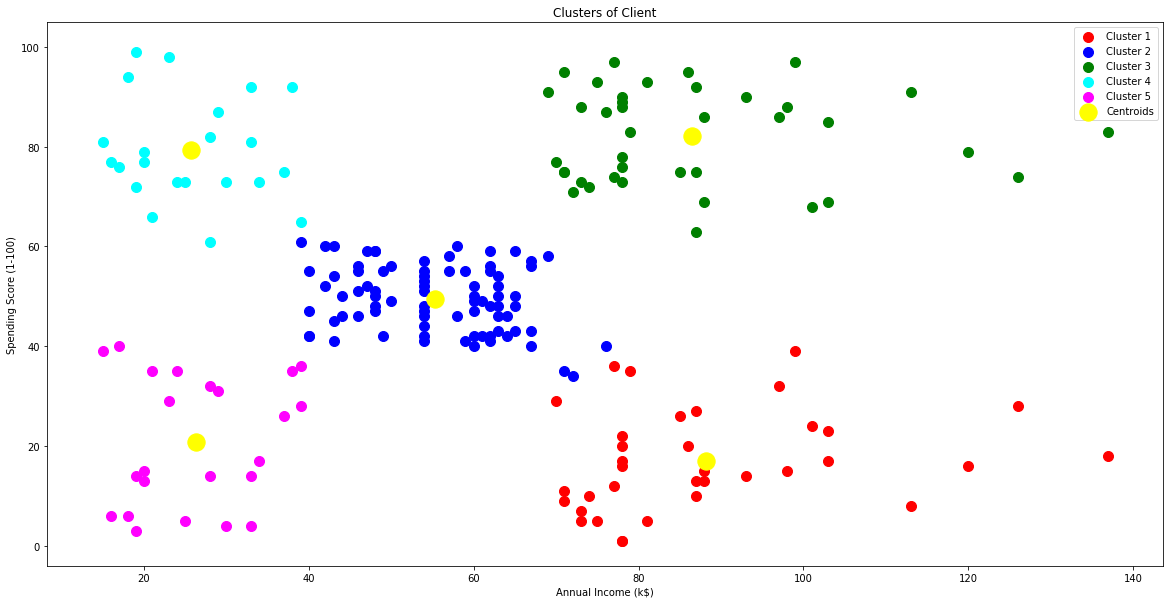

In [9]:
#Visualizing the clusters
# ONLY for two dimensions
# for higher dimensions, reduce the dimension and can then plot 
# it on reduced dimension
# scatter plot of all observations

##X[y_kmeans ==0] cluster one observations
#<<IMPORTANT >> analysis of results is very important 
plt.figure(figsize=(20,10))
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s=100, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Client')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
